In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ecom = pd.read_csv('/content/ecommerce_data.csv')
ecom.head()

,Customer_ID,Purchase_Amount,Delivery_Time,Rating,Product_Category
0,CUST1000,4787.36,4,4,Books
1,CUST1001,2988.93,1,5,Books
2,CUST1002,2764.57,1,5,Electronics
3,CUST1003,2764.60,1,4,Books
4,CUST1004,9299.43,7,4,Clothing


In [ ]:
ecom = ecom.drop('Customer_ID',axis=1)
ecom.head()

,Purchase_Amount,Delivery_Time,Rating,Product_Category
0,4787.36,4,4,Books
1,2988.93,1,5,Books
2,2764.57,1,5,Electronics
3,2764.60,1,4,Books
4,9299.43,7,4,Clothing


## Descriptive Analysis

In [ ]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Purchase_Amount   1000 non-null   float64
 1   Delivery_Time     1000 non-null   int64  
 2   Rating            1000 non-null   int64  
 3   Product_Category  1000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [ ]:
ecom.describe()

,Purchase_Amount,Delivery_Time,Rating
count,1000.000000,1000.000000,1000.000000
mean,4119.860500,4.922000,3.147000
std,2805.714062,2.103887,1.430188
min,91.840000,0.000000,1.000000
25%,2052.425000,3.000000,2.000000
50%,3458.130000,5.000000,3.000000
75%,5484.315000,6.000000,4.000000
max,15573.780000,12.000000,5.000000


<Axes: xlabel='Purchase_Amount', ylabel='Density'>

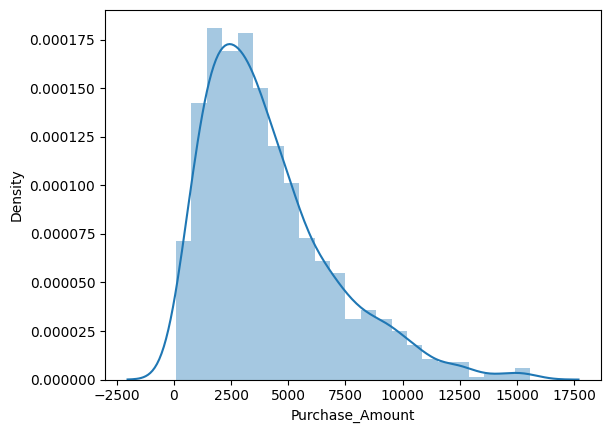

In [ ]:
sns.distplot(ecom['Purchase_Amount'])

<Axes: xlabel='Delivery_Time', ylabel='Density'>

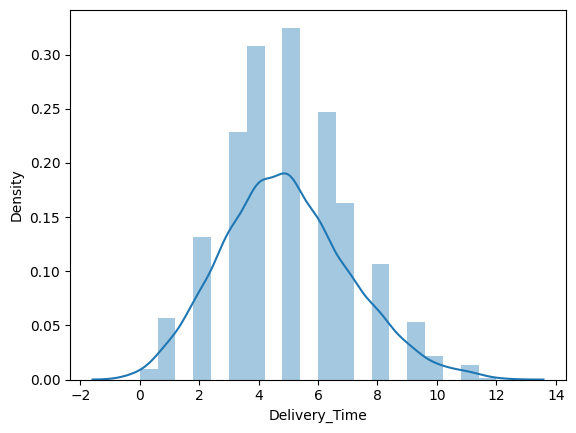

In [ ]:
sns.distplot(ecom['Delivery_Time'])

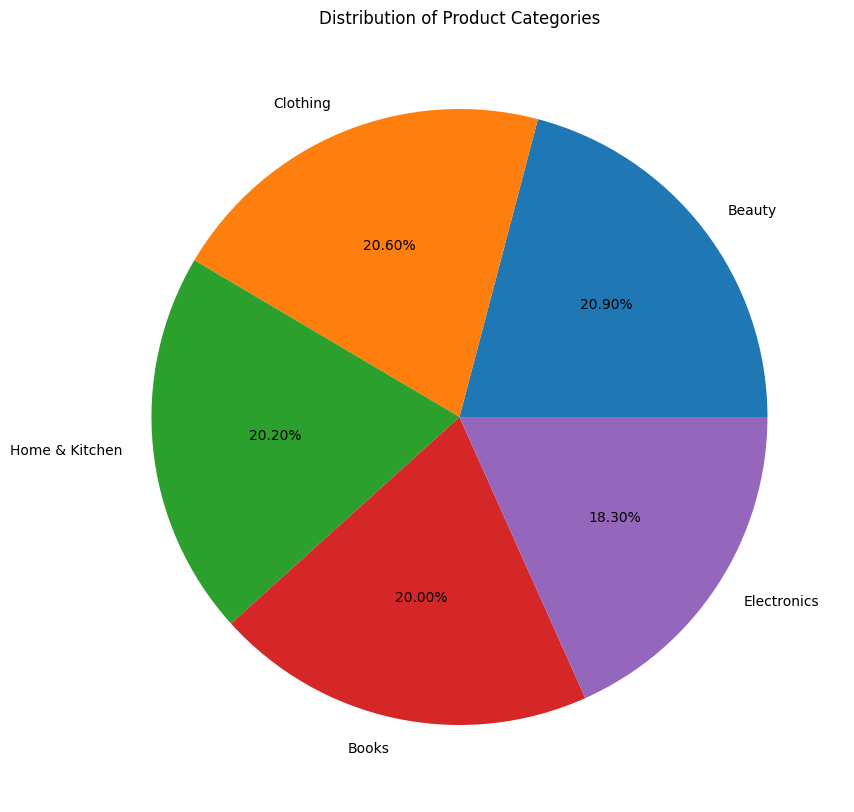

In [ ]:
category_counts = ecom['Product_Category'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.2f%%')
plt.title('Distribution of Product Categories')
plt.show()

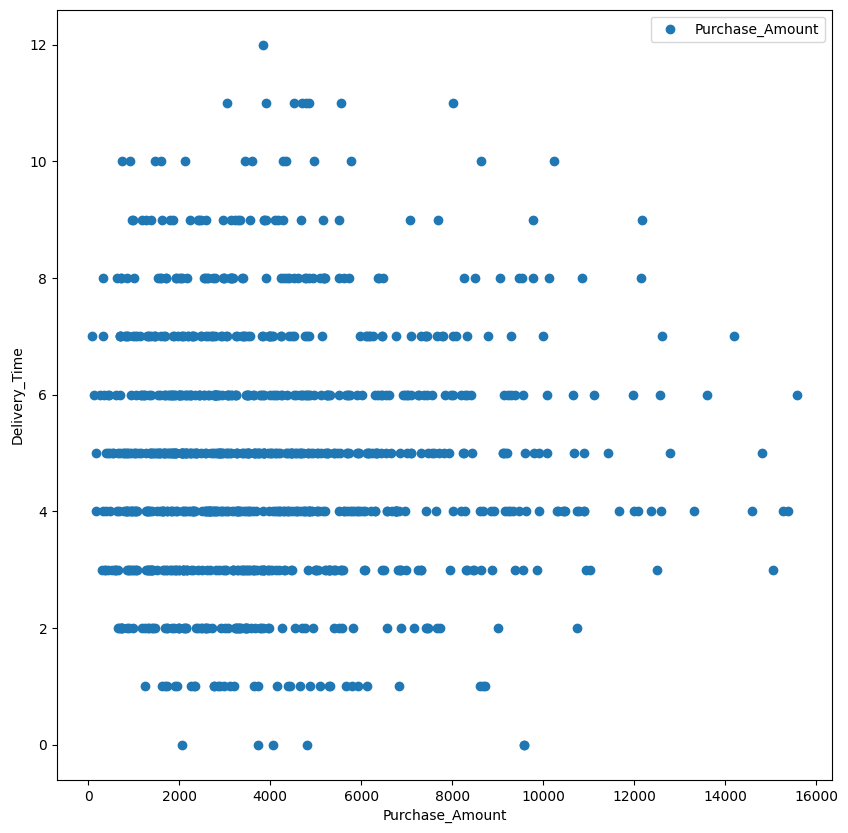

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(ecom['Purchase_Amount'], ecom['Delivery_Time'], label='Purchase_Amount')
plt.xlabel('Purchase_Amount')
plt.ylabel('Delivery_Time')
plt.legend()
plt.show()

In [ ]:
delivery_stats = (
    ecom.groupby("Product_Category")["Delivery_Time"]
    .mean()
    .sort_values()
)

print("Average Delivery Time by Category:\n")
print(delivery_stats)

print("\nFastest Delivery Category:")
print(delivery_stats.idxmin(), delivery_stats.min())

print("\nSlowest Delivery Category:")
print(delivery_stats.idxmax(), delivery_stats.max())

Average Delivery Time by Category:

Product_Category
Clothing          4.733010
Electronics       4.775956
Home & Kitchen    4.935644
Books             4.960000
Beauty            5.186603
Name: Delivery_Time, dtype: float64

Fastest Delivery Category:
Clothing 4.733009708737864

Slowest Delivery Category:
Beauty 5.186602870813397


In [ ]:
for col in ecom:
    if ecom[col].dtype == 'O':
        codes, _ = pd.factorize(ecom[col])
        ecom[col] = codes + 1

<Axes: >

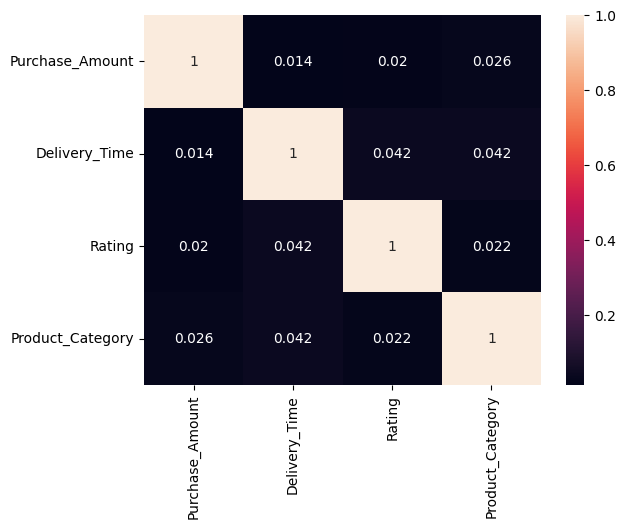

In [ ]:
ecomcorr = ecom.corr()
sns.heatmap(ecomcorr,annot=True)

## Linear Regression

In [ ]:
X = ecom.drop('Purchase_Amount',axis=1)
y = ecom['Purchase_Amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
ecomlin = LinearRegression()
ecomlin.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = ecomlin.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Accuracy:", ecomlin.score(X_test, y_test))

Mean Squared Error: 8111739.572366262
Accuracy: -0.032558777606804146


## Decision Tree Regressor

In [ ]:
ecomdec = DecisionTreeRegressor(max_depth = 2,criterion='squared_error',min_weight_fraction_leaf=0.5)
ecomdec.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, min_weight_fraction_leaf=0.5)

In [ ]:
y_pred = ecomdec.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Accuracy:", ecomdec.score(X_test, y_test))

Mean Squared Error: 8058531.1520547485
Accuracy: -0.025785776458886467


## Random Forest Regressor

In [ ]:
econrandom = RandomForestRegressor(n_estimators=200, max_depth = 5,min_weight_fraction_leaf=0.5)
econrandom.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_weight_fraction_leaf=0.5,
                      n_estimators=200)

In [ ]:
y_pred = econrandom.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Accuracy:", econrandom.score(X_test, y_test))

Mean Squared Error: 8059049.419487302
Accuracy: -0.02585174770732923


## KNearest Neighbor Regressor

In [ ]:
ecomknn = KNeighborsRegressor(n_neighbors= 40, weights= 'uniform')
ecomknn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=40)

In [ ]:
y_pred = ecomknn.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Accuracy:", ecomknn.score(X_test, y_test))

Mean Squared Error: 8222812.1046182895
Accuracy: -0.04669741175607456


## Decision Tree Classifier

In [ ]:
X = ecom.drop('Rating',axis=1)
y = ecom['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
ecomdec = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
ecomdec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred = ecomdec.predict(X_test)

In [ ]:
print("Accuracy:", ecomdec.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.205
              precision    recall  f1-score   support

           1       0.19      0.15      0.16        41
           2       0.33      0.03      0.05        36
           3       0.00      0.00      0.00        36
           4       0.36      0.11      0.16        47
           5       0.19      0.72      0.31        40

    accuracy                           0.20       200
   macro avg       0.21      0.20      0.14       200
weighted avg       0.22      0.20      0.14       200



## Random Forest Classifier

In [ ]:
ecomrandom = RandomForestClassifier(n_estimators=200, max_depth = 7,min_samples_leaf=5)
ecomrandom.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=200)

In [ ]:
y_pred = ecomrandom.predict(X_test)

In [ ]:
print("Accuracy:", ecomrandom.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.23
              precision    recall  f1-score   support

           1       0.15      0.07      0.10        41
           2       0.25      0.11      0.15        36
           3       0.17      0.11      0.14        36
           4       0.27      0.28      0.27        47
           5       0.24      0.55      0.33        40

    accuracy                           0.23       200
   macro avg       0.22      0.22      0.20       200
weighted avg       0.22      0.23      0.20       200



## KNearest Neighbor Classifier

In [ ]:
ecomknn = KNeighborsClassifier(n_neighbors = 12)
ecomknn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
y_pred = ecomknn.predict(X_test)

In [ ]:
print("Accuracy:", ecomknn.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.24
              precision    recall  f1-score   support

           1       0.09      0.10      0.10        41
           2       0.32      0.25      0.28        36
           3       0.24      0.22      0.23        36
           4       0.24      0.17      0.20        47
           5       0.30      0.47      0.37        40

    accuracy                           0.24       200
   macro avg       0.24      0.24      0.24       200
weighted avg       0.24      0.24      0.23       200

